## CSCI-5800 |  BMS Lab05 - OCV Curve with different internal resistance 🧪
<h5>Done by Sundeep Dayalan (02-21-2024)</h5>

> **See Also**: To refer full code, visit [GitHub Code](https://github.com/Sundeep-D/Battery-management-System-Labs).

0         8.13
1         8.13
2         8.13
3         8.15
4         8.13
          ... 
207559    5.74
207560    0.83
207561    0.29
207562    0.07
207563    0.00
Name: Voltage1, Length: 207564, dtype: float64
0         8.13
1         8.13
2         8.13
3         8.15
4         8.13
          ... 
207559    5.74
207560    0.83
207561    0.29
207562    0.07
207563    0.00
Name: Voltage1_smoothed, Length: 207564, dtype: float64


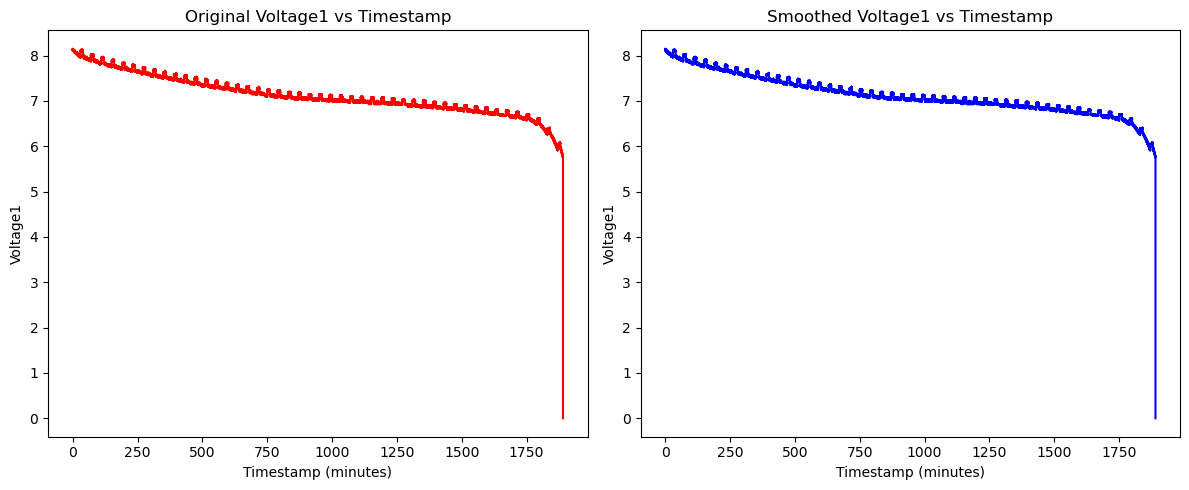

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file into a DataFrame
df = pd.read_csv('OCV-CCV-LOG.csv')

# Convert the Timestamp column from milliseconds to minutes
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
df['Timestamp'] = (df['Timestamp'] - df['Timestamp'].min()).dt.total_seconds() / 60

# Apply a rolling mean to smooth the 'Voltage1' data
window_size = 1 # Increase the window size for more smoothing
print(df['Voltage1'])
df['Voltage1_smoothed'] = df['Voltage1'].rolling(window=window_size).mean()
print(df['Voltage1_smoothed'])

# Store the smoothed data in a variable with 'Timestamp', 'Voltage1_smoothed', and 'Circuit' columns
smoothed_data = df[['Timestamp', 'Voltage1_smoothed', 'Circuit']]
# smoothed_data = df

# Plot the original data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(df['Timestamp'], df['Voltage1'], label='Original Voltage1', color='red')
plt.xlabel('Timestamp (minutes)')
plt.ylabel('Voltage1')
plt.title('Original Voltage1 vs Timestamp')

# Plot the smoothed data
plt.subplot(1, 2, 2)
plt.plot(smoothed_data['Timestamp'], smoothed_data['Voltage1_smoothed'], label='Smoothed Voltage1', color='blue')
plt.xlabel('Timestamp (minutes)')
plt.ylabel('Voltage1')
plt.title('Smoothed Voltage1 vs Timestamp')

plt.tight_layout()
plt.show()


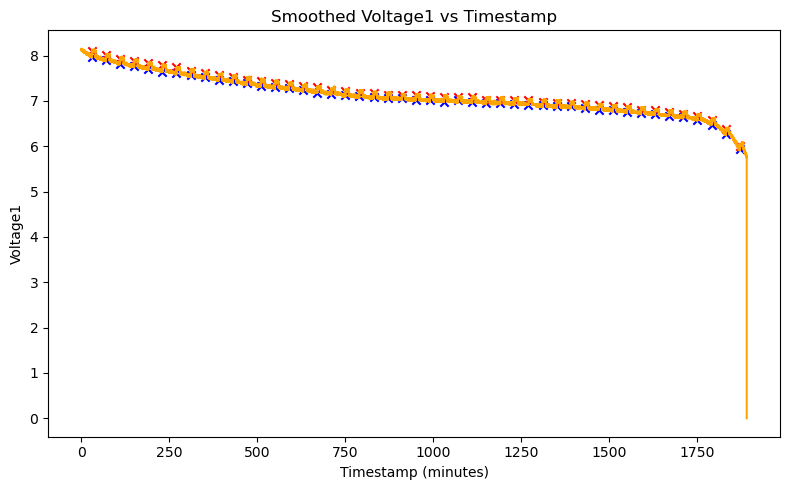

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'smoothed_data' is already defined or loaded from previous code

# Identify the points where 'Circuit' changes from 'Closed' to 'Open'
change_indices = smoothed_data.index[(smoothed_data['Circuit'] == 'Open') & (smoothed_data['Circuit'].shift() == 'Closed')]
# print(change_indices)

# Plot the smoothed graph
plt.figure(figsize=(8, 5))

# Smoothed Voltage1 graph
plt.plot(smoothed_data['Timestamp'], smoothed_data['Voltage1_smoothed'], label=f'Smoothed Voltage1', color='orange')
plt.xlabel('Timestamp (minutes)')
plt.ylabel('Voltage1')
plt.title(f'Smoothed Voltage1 vs Timestamp')

# Iterate over change points and calculate values
for index in change_indices:
    if index >= 3 and index + 3 < len(smoothed_data):
        # Set the value for 'Closed' to -1
        closed_value = smoothed_data['Voltage1_smoothed'].iloc[index-2]
        # Set the value for 'Open' to the first value + 1
        open_value = smoothed_data['Voltage1_smoothed'].iloc[index+1]
#         print(f'{closed_value:.5f},{open_value:.5f}')
        
        # Plot the values
        plt.scatter(smoothed_data['Timestamp'].iloc[index - 3], closed_value, color='b', marker='x')
        plt.scatter(smoothed_data['Timestamp'].iloc[index], open_value, color='r', marker='x')

        # Plot the first three values when the circuit is open
#         plt.scatter(smoothed_data['Timestamp'].iloc[index:index + 3].values, [open_value] * 3, color='blue', marker='x')

plt.tight_layout()
plt.show()


# Calculate Voltage Drop ∆V


> **Formula**: ΔV=V_initial − V_final


7.98,8.11
7.91,8.01
7.81,7.93
7.76,7.89
7.71,7.84
7.64,7.79
7.62,7.74
7.57,7.67
7.52,7.62
7.47,7.57
7.45,7.52
7.4,7.47
7.32,7.45
7.3,7.4
7.28,7.37
7.25,7.32
7.18,7.3
7.15,7.25
7.13,7.23
7.1,7.18
7.08,7.18
7.06,7.13
7.06,7.13
7.03,7.13
7.01,7.1
6.98,7.08
7.01,7.08
6.98,7.08
6.96,7.03
6.96,7.03
6.93,7.03
6.91,7.01
6.91,6.98
6.88,6.96
6.88,6.96
6.84,6.93
6.81,6.91
6.79,6.88
6.76,6.86
6.74,6.81
6.71,6.79
6.67,6.76
6.64,6.71
6.59,6.67
6.47,6.57
6.27,6.37
5.93,6.01


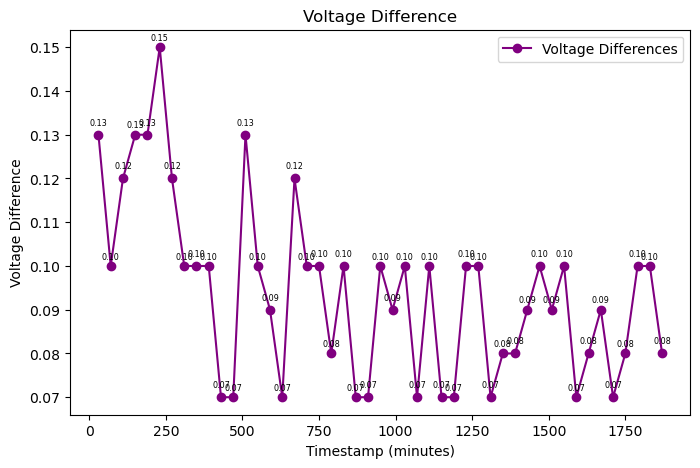

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Markdown, display

def printmd(string, size=2):
    display(Markdown(f'<h{size}>{string}</h{size}>'))

# Assume 'smoothed_data' is already defined or loaded from previous code

# Identify the points where 'Circuit' changes from 'Closed' to 'Open'
change_indices = smoothed_data.index[(smoothed_data['Circuit'] == 'Open') & (smoothed_data['Circuit'].shift() == 'Closed')]

# Initialize lists to store voltage differences and timestamps
voltage_differences = []
timestamps_for_differences = []

# Iterate over change points and calculate values
for index in change_indices:
    if index >= 3 and index + 3 < len(smoothed_data):
        # Set the value for 'Closed' to -1
        closed_value = smoothed_data['Voltage1_smoothed'].iloc[index-2]
        # Set the value for 'Open' to the first value + 1
        open_value = smoothed_data['Voltage1_smoothed'].iloc[index+1]
        
        # Calculate the voltage difference and append to the list
        print(f"{closed_value},{open_value}")
        voltage_difference = open_value - closed_value
        voltage_differences.append(voltage_difference)
        timestamps_for_differences.append(smoothed_data['Timestamp'].iloc[index])

# Plot the voltage differences
plt.figure(figsize=(8, 5))
plt.plot(timestamps_for_differences, voltage_differences, marker='o', linestyle='-', color='purple', label='Voltage Differences')
plt.xlabel('Timestamp (minutes)')
plt.ylabel('Voltage Difference')
plt.title('Voltage Difference')

# Add annotations near each marker with smaller font size and closer to the marker
for i, txt in enumerate(voltage_differences):
    offset = 1 if i % 2 == 0 else -1
    plt.annotate(f'{txt:.2f}', (timestamps_for_differences[i], voltage_differences[i]), textcoords="offset points", xytext=(0, offset+6), ha='center', fontsize='xx-small')

plt.legend()
plt.show()


# Calculate Internal Resistance


> **Formula**: 𝑅=∆V / I

Processing file: 100%|█████████████████████████████████████████████████████| 207564/207564 [00:11<00:00, 18071.30row/s]


Range: 8.13-8.03, ∆V: 0.13, R: 5.84Ω
Range: 8.03-7.93, ∆V: 0.10, R: 4.5Ω
Range: 7.93-7.89, ∆V: 0.12, R: 5.39Ω
Range: 7.89-7.81, ∆V: 0.13, R: 5.84Ω
Range: 7.81-7.76, ∆V: 0.10, R: 4.5Ω
Range: 7.76-7.71, ∆V: 0.12, R: 5.39Ω
Range: 7.71-7.67, ∆V: 0.09, R: 4.05Ω
Range: 7.67-7.64, ∆V: 0.12, R: 5.39Ω
Range: 7.64-7.57, ∆V: 0.10, R: 4.5Ω
Range: 7.57-7.54, ∆V: 0.10, R: 4.5Ω
Range: 7.54-7.50, ∆V: 0.07, R: 3.15Ω
Range: 7.50-7.45, ∆V: 0.07, R: 3.15Ω
Range: 7.45-7.40, ∆V: 0.13, R: 5.84Ω
Range: 7.40-7.35, ∆V: 0.10, R: 4.5Ω
Range: 7.35-7.32, ∆V: 0.07, R: 3.15Ω
Range: 7.32-7.30, ∆V: 0.10, R: 4.5Ω
Range: 7.30-7.25, ∆V: 0.12, R: 5.39Ω
Range: 7.25-7.23, ∆V: 0.10, R: 4.5Ω
Range: 7.23-7.18, ∆V: 0.07, R: 3.15Ω
Range: 7.18-7.15, ∆V: 0.08, R: 3.6Ω
Range: 7.15-7.13, ∆V: 0.10, R: 4.5Ω
Range: 7.13-7.10, ∆V: 0.09, R: 4.05Ω
Range: 7.10-7.10, ∆V: 0.07, R: 3.15Ω
Range: 7.10-7.08, ∆V: 0.10, R: 4.5Ω
Range: 7.08-7.08, ∆V: 0.09, R: 4.05Ω
Range: 7.08-7.06, ∆V: 0.12, R: 5.39Ω
Range: 7.06-7.03, ∆V: 0.07, R: 3.15Ω
Range: 7.03

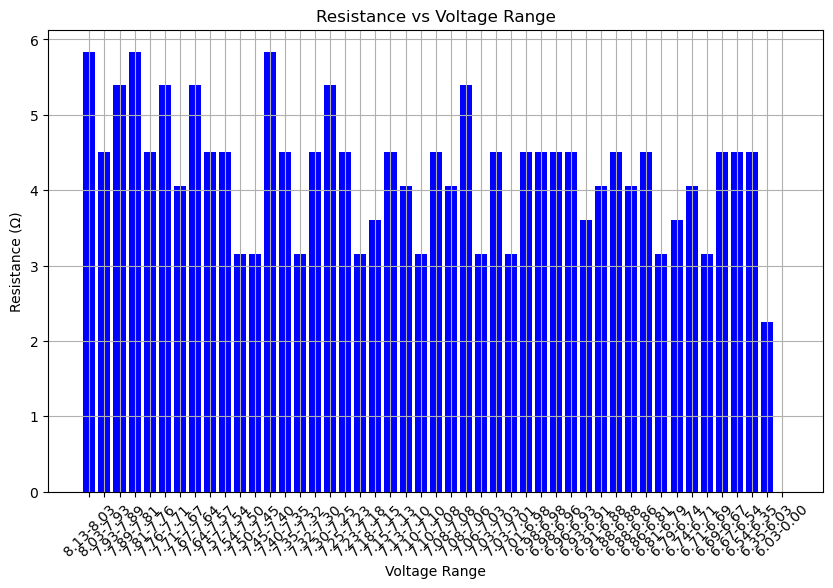

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

def calculateResistance(current, voltage_drop):
    current_A = current / 1000
    resistance = round((voltage_drop / current_A), 2)
    resistance = abs(resistance)
    return resistance

def calculate_voltage_difference(df, index):
    if index >= 2 and index + 2 < len(df):
        voltage_diff = df.iloc[index + 2]['Voltage1_smoothed'] - df.iloc[index - 2]['Voltage1_smoothed']
        return voltage_diff
    return 0

# Load CSV file into a DataFrame
df_current = pd.read_csv('CCV-LOG.csv')  # Change the file name accordingly

# Calculate average current excluding zero values
current = df_current.loc[df_current['Current'] != 0, 'Current'].mean()

df = smoothed_data

# Initialize variables
start_point = None
end_point = None
checking = False
mid_reached = False
results_dict = {}

# Iterate through rows with tqdm progress bar
for index, row in tqdm(df.iterrows(), desc="Processing file", total=len(df), unit="row"):
    voltage = row['Voltage1_smoothed']
    circuit = row['Circuit']

    if circuit == 'Closed' and not checking:
        start_point = voltage
        checking = True
    elif circuit == 'Open' and not mid_reached:
        mid_reached = True
        voltage_diff = calculate_voltage_difference(df, index)
    elif circuit == 'Closed' and mid_reached:
        end_point = voltage
        mid_reached = False
        checking = True
        # Store results in the dictionary
        results_dict[f"{start_point:.2f}-{end_point:.2f}"] = {'Voltage Drop': voltage_diff, 'Resistance': calculateResistance(current, voltage_diff)}
        start_point = end_point

# If the last range is still open, store the start point without an end point
if checking:
    end_point = 0
    voltage_diff = 0
    results_dict[f"{start_point:.2f}-{end_point:.2f}"] = {'Voltage Drop': voltage_diff, 'Resistance': calculateResistance(current, voltage_diff)}

# Print the results
for key, values in results_dict.items():
    print(f"Range: {key}, ∆V: {values['Voltage Drop']:.2f}, R: {values['Resistance']}Ω")

# Extract data for plotting
ranges = [key for key in results_dict]
resistances = [values['Resistance'] for values in results_dict.values()]
# Find high resistance, low resistance, and mean resistance
high_resistance = max(resistances)
low_resistance = min(resistances)
mean_resistance = sum(resistances) / len(resistances)

# Print the additional information
print(f"\nHigh Resistance observed: {high_resistance:.2f}Ω")
print(f"Low Resistance observed: {low_resistance:.2f}Ω")
print(f"Mean Resistance: {mean_resistance:.2f}Ω") 

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(ranges, resistances, color='blue')
plt.title('Resistance vs Voltage Range')
plt.xlabel('Voltage Range')
plt.ylabel('Resistance (Ω)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()









# Update Log file based on new Resistance and add new column OCV


In [5]:
import pandas as pd
from tqdm import tqdm
import time

# Read the original log file
file_path = "CCV-LOG.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Convert current from mA to A
df['Current'] = df['Current'] / 1000  # Convert mA to A

# Function to find resistance based on Voltage1 value
def find_resistance(voltage_value):
    for entry_key, values in results_dict.items():
        start, end = map(float, entry_key.split('-'))
        if start <= voltage_value <= end:
            return values['Resistance']
    return 0.0  # Default resistance value when no matching range is found

# Calculate OCV using the formula and store in a new column 'OCV'
progress_bar = tqdm(total=len(df), desc="Processing file", unit="row")  # Initialize progress bar
df['OCV'] = df.apply(lambda row: row['Voltage1'] + row['Current'] * find_resistance(row['Voltage1']), axis=1)
# df['OCV'] = df.apply(lambda row: row['Voltage1'] + (current/ 1000) * find_resistance(row['Voltage1']), axis=1)
progress_bar.update(len(df))  # Update progress bar to 100%

# Create a new file with the updated log
new_file_path = "CCV-CCV-LOG-UPDATED.csv"

# Display processing animation
saving_progress_bar = tqdm(range(10), desc="Saving file", unit="iteration")
for _ in saving_progress_bar:
    time.sleep(0.1)  # Simulate saving time
    saving_progress_bar.set_postfix({"Progress": f"{_ + 1}/{len(saving_progress_bar)}"}, refresh=True)

df.to_csv(new_file_path, index=False)

print(f"\nNew log file '{new_file_path}' created with OCV column.")


Saving file: 100%|██████████████████████████████████████████████| 10/10 [00:01<00:00,  8.96iteration/s, Progress=10/10]



New log file 'CCV-CCV-LOG-UPDATED.csv' created with OCV column.


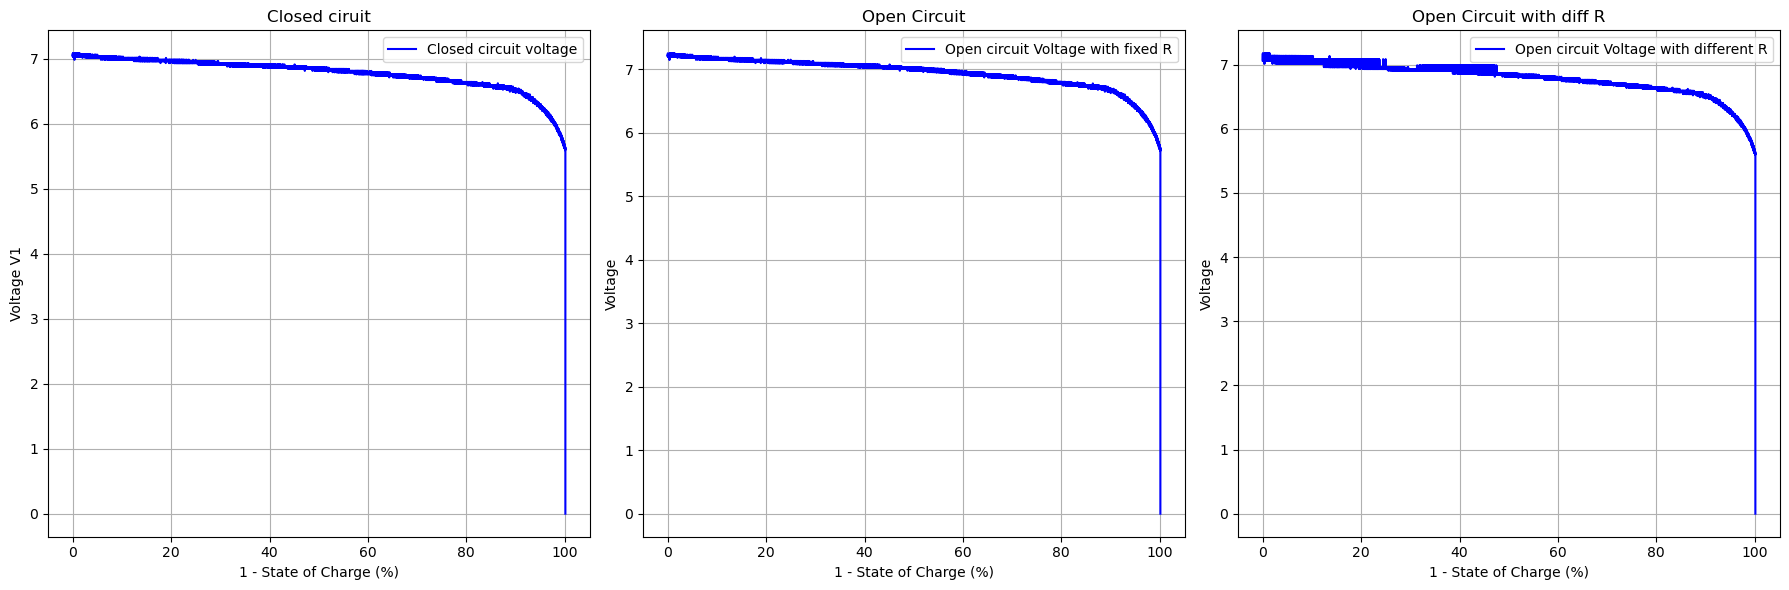

Processing file: 100%|███████████████████████████████████████████████████████| 80244/80244 [00:17<00:00, 17053.69row/s]

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

marker_point=''

# Read the first CSV file
file_path1 = "CCV-LOG.csv"
df = pd.read_csv(file_path1)

# Calculate State of Charge (SoC)
df['SoC'] = (1 - ((271 - df['TotalCapacity']) / 271)) * 100

# Plot the data for the first CSV file
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axes[0].plot(df['SoC'], df['Voltage1'], marker=marker_point, linestyle='-', color='b', label='Closed circuit voltage')
axes[0].set_title('Closed ciruit')
axes[0].set_xlabel('1 - State of Charge (%)')
axes[0].set_ylabel('Voltage V1')
axes[0].legend()
axes[0].grid(True)

# Read the second CSV file
file_path2 = r"C:\Users\Admin\OneDrive - The University of Colorado Denver\4th sem\BMS\Labs\Lab04\OCV Curve\CCV-LOG-UPDATED.csv"
df2 = pd.read_csv(file_path2)

# Calculate State of Charge (SoC)
df2['SoC'] = (1 - ((271 - df2['TotalCapacity']) / 271)) * 100

# Plot the data for the second CSV file
axes[1].plot(df2['SoC'], df2['OCV'], marker=marker_point, linestyle='-', color='b', label='Open circuit Voltage with fixed R')
axes[1].set_title('Open Circuit')
axes[1].set_xlabel('1 - State of Charge (%)')
axes[1].set_ylabel('Voltage')
axes[1].legend()
axes[1].grid(True)

# Read the third CSV file
df3 = pd.read_csv(new_file_path)

# Calculate State of Charge (SoC)
df3['SoC'] = (1 - ((271 - df3['TotalCapacity']) / 271)) * 100

# Plot the data for the third CSV file
axes[2].plot(df3['SoC'], df3['OCV'], marker=marker_point, linestyle='-', color='b', label='Open circuit Voltage with different R')
axes[2].set_title('Open Circuit with diff R')
axes[2].set_xlabel('1 - State of Charge (%)')
axes[2].set_ylabel('Voltage')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()
